In [1]:
!pip install raptor_functions 

In [2]:
# from raptor_functions.supervised.prediction import get_production_model, make_prediction_with_pm
from raptor_functions.supervised.datasets import get_data
import pandas as pd
from raptor_functions.supervised.feature_extraction import *

from raptor_functions.supervised.prediction import make_ensemble_prediction, make_prediction_with_pm

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = get_data('handheld_data')

# select one single experiment
# df_exp = df.groupby('exp_unique_id').get_group(0)

In [5]:
df

,exp_unique_id,exp_name,timesteps,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_23,sensor_24,Humidity (r.h.),measurement_stage,date_exp,time_elapsed,datetime_exp_start,datetime_exp,filename,result
0,0,Test 24,1,131.938,132.443,177.444,178.157,44.974,44.508,219.374,...,143.288,142.050,46.07,baseline,21/3/2022,0.00,14:12:54,2022-03-21 14:12:54.000,5 NegTest_3_20220321_14_12.txt,Control
1,0,Test 24,2,133.078,133.972,177.444,178.694,45.131,44.611,219.607,...,142.874,141.914,46.07,baseline,21/3/2022,0.25,14:12:54,2022-03-21 14:12:54.250,5 NegTest_3_20220321_14_12.txt,Control
2,0,Test 24,3,131.812,132.064,177.622,178.694,45.183,44.663,219.841,...,143.288,141.914,46.07,baseline,21/3/2022,0.50,14:12:54,2022-03-21 14:12:54.500,5 NegTest_3_20220321_14_12.txt,Control
3,0,Test 24,4,131.059,132.064,177.444,178.694,45.183,44.663,219.607,...,142.599,141.368,46.07,baseline,21/3/2022,0.75,14:12:54,2022-03-21 14:12:54.750,5 NegTest_3_20220321_14_12.txt,Control
4,0,Test 24,5,131.435,131.938,177.622,178.694,45.131,44.663,219.607,...,142.187,140.825,46.07,baseline,21/3/2022,1.00,14:12:54,2022-03-21 14:12:55.000,5 NegTest_3_20220321_14_12.txt,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,29,Test 24,124,131.812,132.317,176.558,177.622,45.969,45.444,219.841,...,146.222,144.956,46.39,flush,21/3/2022,30.75,14:07:33,2022-03-21 14:08:03.750,3 PosTest_3_20220321_14_07.txt,Covid
124,29,Test 24,125,131.560,132.190,176.558,177.622,45.864,45.339,219.607,...,147.073,145.517,46.39,flush,21/3/2022,31.00,14:07:33,2022-03-21 14:08:04.000,3 PosTest_3_20220321_14_07.txt,Covid
125,29,Test 24,126,130.933,131.938,176.735,177.800,45.969,45.392,219.607,...,145.799,144.258,46.39,flush,21/3/2022,31.25,14:07:33,2022-03-21 14:08:04.250,3 PosTest_3_20220321_14_07.txt,Covid
126,29,Test 24,127,131.435,132.317,176.735,177.800,45.969,45.496,219.841,...,146.505,145.096,46.39,flush,21/3/2022,31.50,14:07:33,2022-03-21 14:08:04.500,3 PosTest_3_20220321_14_07.txt,Covid


In [5]:
# pred = make_ensemble_prediction(df_exp)

In [6]:
# pred = make_prediction_with_pm(df_exp)

In [7]:
unique_id = 'exp_unique_id'
label = 'result'

y = df.groupby(unique_id).first()[label]
X = df.drop(label, axis=1)

In [8]:
preds = make_prediction_with_pm(X)

IndexError: list index out of range

In [9]:
def label(row, preds, map={0:'Control', 1:'Covid'}):
    for i, pred in enumerate(preds):
        if i == row['exp_unique_id']:
            return map[pred]


In [10]:
X['result'] = X.apply(lambda row: label(row, preds), axis=1)

NameError: name 'preds' is not defined

In [ ]:
# X.drop('label', axis=1, inplace=True)

In [11]:
df_f = get_training_features(df)



Extracting all features


Feature Extraction: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]


: 

: 

In [ ]:
X_f = get_training_features(X)

Extracting all features


Feature Extraction: 100%|██████████| 20/20 [00:15<00:00,  1.28it/s]


Selecting relevant features
[12:30:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:30:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:30:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:31:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evalu

In [ ]:
X_f

,"sensor_5__fft_coefficient__attr_""angle""__coeff_34",sensor_9__number_peaks__n_5,"sensor_9__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0",result
0,27.346596,1.0,17.937040,Control
1,123.682517,0.0,40.774378,Control
2,-23.344104,1.0,17.942189,Control
3,-156.476693,0.0,44.607295,Covid
4,-13.985148,2.0,34.858777,Control
5,11.005274,1.0,33.899061,Control
6,-91.278644,0.0,34.999182,Covid
7,-78.789486,0.0,40.940327,Covid
8,106.327260,1.0,20.625506,Control
9,-45.641385,0.0,43.243222,Covid


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# np.random.seed(1974)

# # Generate Data
# num = 20
# x, y = np.random.random((2, num))
# labels = np.random.choice(['a', 'b', 'c'], num)
# df = pd.DataFrame(dict(x=x, y=y, label=labels))



In [ ]:
df_f

,"sensor_5__fft_coefficient__attr_""angle""__coeff_34",sensor_23__maximum,result
0,27.346596,160.861,Control
1,123.682517,160.388,Covid
2,-23.344104,164.542,Control
3,-156.476693,161.812,Covid
4,-13.985148,163.250,Control
5,11.005274,163.411,Control
6,-91.278644,162.449,Covid
7,-78.789486,162.929,Covid
8,106.327260,167.658,Control
9,-45.641385,160.231,Covid


In [ ]:
groups_1 = df_f.groupby('result')


In [ ]:
groups

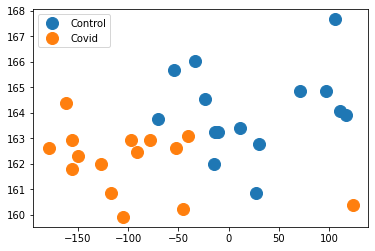

In [ ]:
groups_1 = df_f.groupby('result')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups_1:
    ax.plot(group['sensor_5__fft_coefficient__attr_"angle"__coeff_34'], group['sensor_23__maximum'], marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [ ]:
X_f

,"sensor_5__fft_coefficient__attr_""angle""__coeff_34",sensor_9__number_peaks__n_5,"sensor_15__fft_coefficient__attr_""angle""__coeff_50",result
0,27.346596,1.0,134.353866,Control
1,123.682517,0.0,-134.054680,Control
2,-23.344104,1.0,164.868444,Control
3,-156.476693,0.0,-146.016998,Covid
4,-13.985148,2.0,-176.482261,Control
5,11.005274,1.0,-148.071934,Control
6,-91.278644,0.0,137.875246,Covid
7,-78.789486,0.0,147.571132,Covid
8,106.327260,1.0,-171.911178,Control
9,-45.641385,0.0,175.474296,Covid


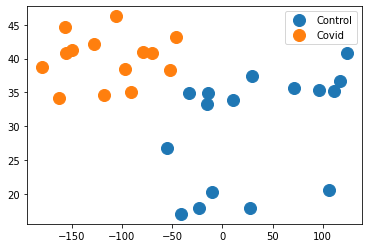

In [ ]:
groups_2 = X_f.groupby('result')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups_2:
    ax.plot(group['sensor_5__fft_coefficient__attr_"angle"__coeff_34'], group['sensor_9__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.0'], marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [ ]:
X_f

,"sensor_5__fft_coefficient__attr_""angle""__coeff_34",sensor_9__number_peaks__n_5,result
0,27.346596,1.0,Control
1,123.682517,0.0,Control
2,-23.344104,1.0,Control
3,-156.476693,0.0,Covid
4,-13.985148,2.0,Control
5,11.005274,1.0,Control
6,-91.278644,0.0,Covid
7,-78.789486,0.0,Covid
8,106.327260,1.0,Control
9,-45.641385,0.0,Covid


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

# Load pca
from pca import pca

# Load dataset
label = load_iris().feature_names
y = load_iris().target
X = pd.DataFrame(data=load_iris().data, columns=label, index=y)


# Initialize to reduce the data up to the nubmer of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Reduce the data towards 3 PCs
model = pca(n_components=3)

# Fit transform
results = model.fit_transform(X)

In [ ]:
# Cumulative explained variance
print(model.results['explained_var'])
# [0.92461872 0.97768521 0.99478782]

In [ ]:

# Explained variance per PC
print(model.results['variance_ratio'])
[0.92461872, 0.05306648, 0.01710261]

In [ ]:



# Make plot
fig, ax = model.plot()

In [ ]:
# The number of components are extracted that cover at least 95% of the explained variance.
model = pca(n_components=0.95)

In [ ]:
# 2D plot
fig, ax = model.scatter()

In [ ]:


# 3d Plot
fig, ax = model.scatter3d()

In [ ]:
# 2D plot
fig, ax = model.biplot(n_feat=4, PC=[0,1])

# 3d Plot
fig, ax = model.biplot3d(n_feat=2, PC=[0,1,2])

Plotting unseen data

In [ ]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from pca import pca

# Load dataset
data = datasets.load_wine()
X = data.data
y = data.target.astype(str)
col_labels = data.feature_names

# Initialize with normalization and take the number of components that covers at least 95% of the variance.
model = pca(n_components=0.95, normalize=True)


# Get some random samples across the classes
idx=[0,1,2,3,4,50,53,54,55,100,103,104,105, 130, 150]
X_unseen = X[idx, :]
y_unseen = y[idx]

# Label original dataset to make sure the check which samples are overlapping
y[idx]='unseen'

# Fit transform
model.fit_transform(X, col_labels=col_labels, row_labels=y)

# Transform new "unseen" data. Note that these datapoints are not really unseen as they are readily fitted above.
# But for the sake of example, you can see that these samples will be transformed exactly on top of the orignial ones.
PCnew = model.transform(X_unseen)

# Plot PC space
fig, ax = model.scatter(title='Map unseen samples in the existing space.')
# Plot the new "unseen" samples on top of the existing space
ax.scatter(PCnew.iloc[:, 0], PCnew.iloc[:, 1], marker='x', s=200)

In [ ]:
a = X.head()
b = X.tail()

In [ ]:
df['result'].value_counts()

Control    1920
Covid      1920
Name: result, dtype: int64

In [ ]:
X['label'].value_counts()

0    2048
1    1792
Name: label, dtype: int64

In [ ]:
b

,exp_unique_id,exp_name,timesteps,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_23,sensor_24,Humidity (r.h.),measurement_stage,date_exp,time_elapsed,datetime_exp_start,datetime_exp,filename,label
123,29,Test 24,124,131.812,132.317,176.558,177.622,45.969,45.444,219.841,...,146.222,144.956,46.39,flush,21/3/2022,30.75,14:07:33,2022-03-21 14:08:03.750,3 PosTest_3_20220321_14_07.txt,1
124,29,Test 24,125,131.560,132.190,176.558,177.622,45.864,45.339,219.607,...,147.073,145.517,46.39,flush,21/3/2022,31.00,14:07:33,2022-03-21 14:08:04.000,3 PosTest_3_20220321_14_07.txt,1
125,29,Test 24,126,130.933,131.938,176.735,177.800,45.969,45.392,219.607,...,145.799,144.258,46.39,flush,21/3/2022,31.25,14:07:33,2022-03-21 14:08:04.250,3 PosTest_3_20220321_14_07.txt,1
126,29,Test 24,127,131.435,132.317,176.735,177.800,45.969,45.496,219.841,...,146.505,145.096,46.39,flush,21/3/2022,31.50,14:07:33,2022-03-21 14:08:04.500,3 PosTest_3_20220321_14_07.txt,1
127,29,Test 24,128,130.684,131.686,176.735,177.800,45.864,45.339,219.841,...,145.799,144.258,46.39,flush,21/3/2022,31.75,14:07:33,2022-03-21 14:08:04.750,3 PosTest_3_20220321_14_07.txt,1


In [ ]:
pd.concat([a,b], axis=1)

,exp_unique_id,exp_name,timesteps,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_23,sensor_24,Humidity (r.h.),measurement_stage,date_exp,time_elapsed,datetime_exp_start,datetime_exp,filename,label
0,0.0,Test 24,1.0,131.938,132.443,177.444,178.157,44.974,44.508,219.374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,Test 24,2.0,133.078,133.972,177.444,178.694,45.131,44.611,219.607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,Test 24,3.0,131.812,132.064,177.622,178.694,45.183,44.663,219.841,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,Test 24,4.0,131.059,132.064,177.444,178.694,45.183,44.663,219.607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,Test 24,5.0,131.435,131.938,177.622,178.694,45.131,44.663,219.607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.222,144.956,46.39,flush,21/3/2022,30.75,14:07:33,2022-03-21 14:08:03.750,3 PosTest_3_20220321_14_07.txt,1.0
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,147.073,145.517,46.39,flush,21/3/2022,31.00,14:07:33,2022-03-21 14:08:04.000,3 PosTest_3_20220321_14_07.txt,1.0
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,145.799,144.258,46.39,flush,21/3/2022,31.25,14:07:33,2022-03-21 14:08:04.250,3 PosTest_3_20220321_14_07.txt,1.0
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,146.505,145.096,46.39,flush,21/3/2022,31.50,14:07:33,2022-03-21 14:08:04.500,3 PosTest_3_20220321_14_07.txt,1.0
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,145.799,144.258,46.39,flush,21/3/2022,31.75,14:07:33,2022-03-21 14:08:04.750,3 PosTest_3_20220321_14_07.txt,1.0


In [ ]:
from __future__ import absolute_import
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:


# normalization
def normalize(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))

def get_data():
    X, y = datasets.load_breast_cancer(return_X_y=True)
    X = normalize(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 0)
    rng = np.random.RandomState(42)
    random_unlabeled_points = rng.rand(len(X_train)) < 0.1
    y_train[random_unlabeled_points] = -1
    #
    index, = np.where(y_train != -1)
    label_X_train = X_train[index,:]
    label_y_train = y_train[index]
    index, = np.where(y_train == -1)
    unlabel_X_train = X_train[index,:]
    unlabel_y = -1*np.ones(unlabel_X_train.shape[0]).astype(int)
    return label_X_train, label_y_train, unlabel_X_train, unlabel_y, X_test, y_test

In [ ]:
label_X_train, label_y_train, unlabel_X_train, unlabel_y, X_test, y_test = get_data()


In [ ]:


# import
from semisupervised import SKTSVM

Exception: No module named 'torch'
We recommend you install torch first.


ImportError: cannot import name 'SKTSVM' from 'semisupervised' (/Users/amash/anaconda3/envs/rap38/lib/python3.8/site-packages/semisupervised/__init__.py)

In [ ]:



model = SKTSVM()
model.fit(np.vstack((label_X_train, unlabel_X_train)), np.append(label_y_train, unlabel_y))
# predict
predict = model.predict(X_test)
acc = metrics.accuracy_score(y_test, predict)
# metric
print("accuracy", acc)

In [ ]:
!pip install semisupervised